
### Contributors: Abdul Ahad, Shahzaib Ali 

## Step 1

### Reading CSV File
- Read the CSV file containing the data.

### Removing Columns with Null Gender and Age Values
- Remove columns with null values in the `Gender` and `Age` fields.

### Dropping Columns That Are Not Useful
- Drop columns that are not useful for the analysis.

### Creating Columns That Contain Audio Features
- Create columns that contain audio features based on the data.


In [1]:
import librosa
import IPython.display as ipd
import pandas as pd
import numpy as np

data = pd.read_csv('cv-valid-test.csv')


#cleaning data
df = data.dropna(subset=['age', 'gender'], how='any')
## accent duration text
df = df.drop_duplicates()
df.drop('text',axis='columns', inplace=True)
df.drop('up_votes',axis='columns', inplace=True)
df.drop('down_votes',axis='columns', inplace=True)


# add cols
df['pitch'] = np.nan
df['intensity'] = np.nan
df['duration'] = np.nan
df['spectral_centroid'] = np.nan
df['spectral_bandwidth'] = np.nan
df['spectral_contrast'] = np.nan
df['spectral_rolloff'] = np.nan
df['zero_crossing_rate'] = np.nan
df['chroma_stft'] = np.nan
df['mfcc_1'] = np.nan
df['mfcc_2'] = np.nan
df['mfcc_3'] = np.nan

## Step 2: Extraction of Audio Features

### Audio Features Include:
- Spectral Centroid
- Spectral Bandwidth
- Spectral Contrast
- Spectral Rolloff
- Zero Crossing Rate
- Chroma STFT
- MFCC


In [2]:
import librosa

def extract_acoustic_features(audio_file, method='librosa', sample_rate=None):
    if method == 'librosa':
        audio, sample_rate = librosa.load(audio_file, sr=sample_rate)
        
        # Extract MFCCs
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
        mean_mfccs = np.mean(mfccs, axis=1)  # Calculate mean across MFCC coefficients
        
        # Extract other features
        pitches, magnitudes = librosa.piptrack(y=audio, sr=sample_rate)
        pitch = np.mean(pitches[pitches > 0])
        intensity = np.mean(librosa.feature.rms(y=audio))
        duration = librosa.get_duration(y=audio, sr=sample_rate)
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sample_rate))
        spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sample_rate))
        
        # Additional features
        spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=audio, sr=sample_rate))
        spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sample_rate))
        zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=audio))
        chroma_stft = np.mean(librosa.feature.chroma_stft(y=audio, sr=sample_rate))
        
        return {
            'pitch': pitch,
            'intensity': intensity,
            'duration': duration,
            'spectral_centroid': spectral_centroid,
            'spectral_bandwidth': spectral_bandwidth,
            'spectral_contrast': spectral_contrast,
            'spectral_rolloff': spectral_rolloff,
            'zero_crossing_rate': zero_crossing_rate,
            'chroma_stft': chroma_stft,
            'mfcc_1': mean_mfccs[0],  
            'mfcc_2': mean_mfccs[1],
            'mfcc_3': mean_mfccs[2],

        }

    

* Inserting features in featueres columns 
* Dropping rows with null values of `age` `gender` `intensity` `pitch` 

In [3]:
#update feature values
for i in range(len(df)):
    if i in df.index:

        audio_file = df.iloc[i][0]
        acoustic_features = extract_acoustic_features(audio_file, method='librosa')
        df.iloc[i, df.columns.get_loc('pitch')] = acoustic_features['pitch']
        df.iloc[i, df.columns.get_loc('intensity')] = acoustic_features['intensity']
        df.iloc[i, df.columns.get_loc('duration')] = acoustic_features['duration']
        df.iloc[i, df.columns.get_loc('spectral_centroid')] = acoustic_features['spectral_centroid']
        df.iloc[i, df.columns.get_loc('spectral_bandwidth')] = acoustic_features['spectral_bandwidth']
        df.iloc[i, df.columns.get_loc('spectral_contrast')] = acoustic_features['spectral_contrast']
        df.iloc[i, df.columns.get_loc('spectral_rolloff')] = acoustic_features['spectral_rolloff']
        df.iloc[i, df.columns.get_loc('zero_crossing_rate')] = acoustic_features['zero_crossing_rate']
        df.iloc[i, df.columns.get_loc('mfcc_1')] = acoustic_features['mfcc_1']
        df.iloc[i, df.columns.get_loc('mfcc_2')] = acoustic_features['mfcc_2']
        df.iloc[i, df.columns.get_loc('mfcc_3')] = acoustic_features['mfcc_3']
        df.iloc[i, df.columns.get_loc('chroma_stft')] = acoustic_features['chroma_stft']

#clean
data_testing = df.dropna(subset=['pitch', 'intensity' , 'age', 'gender'], how='any')


* Mapping `ages` to improves result

In [4]:
def map_age_to_integer(age_category):
    if 'teens' in age_category:
        return 16
    elif 'twenties' in age_category:
        return 25
    elif 'thirties' in age_category:
        return 35
    elif 'fourties' in age_category:
        return 45
    elif 'fifties' in age_category:
        return 55
    elif 'sixties' in age_category:
        return 65
    elif 'seventies' in age_category:
        return 75
    elif 'eighties' in age_category:
        return 85
    elif 'nineties' in age_category:
        return 90
    # Add more mappings for other age categories as needed
    else:
        return None  # Handle cases where age category is not recognized

# Apply the mapping function to the 'age' column
data_testing['age_integer'] = data_testing['age'].apply(map_age_to_integer)

# Drop rows where age mapping couldn't be done
data_testing = data_testing.dropna(subset=['age_integer'])

# Check the updated DataFrame
data_testing

C:\Users\Shahz\AppData\Local\Temp\ipykernel_5980\1173801070.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_testing['age_integer'] = data_testing['age'].apply(map_age_to_integer)


,filename,age,gender,accent,duration,pitch,intensity,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_rolloff,zero_crossing_rate,chroma_stft,mfcc_1,mfcc_2,mfcc_3,age_integer
3,cv-valid-test/sample-000003.mp3,twenties,male,us,7.704,1263.459595,0.009359,2644.264959,2748.468148,21.295364,5367.187500,0.068299,0.456357,-588.103088,106.388893,19.169491,25
6,cv-valid-test/sample-000006.mp3,twenties,male,NaN,4.680,1939.546753,0.005506,3490.665603,3096.615650,20.072132,6684.172124,0.109354,0.534063,-559.588562,89.208626,-12.495049,25
8,cv-valid-test/sample-000008.mp3,thirties,male,england,6.264,1633.578003,0.089704,2447.306170,1725.896533,21.387904,4089.445153,0.090385,0.436802,-331.307861,137.710678,-16.550856,35
9,cv-valid-test/sample-000009.mp3,fifties,male,us,4.440,1800.516724,0.033003,2492.985509,2431.462898,22.590590,4386.522032,0.080049,0.404276,-410.300934,138.950592,-24.662996,55
11,cv-valid-test/sample-000011.mp3,twenties,male,NaN,4.344,1844.358154,0.032753,2598.063544,2549.647383,21.261749,5051.757812,0.069585,0.516614,-426.013977,138.551132,-32.115078,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,cv-valid-test/sample-003967.mp3,seventies,male,england,2.256,1685.502075,0.063550,1918.334246,1484.452296,19.657592,3337.301002,0.066512,0.473617,-325.603912,153.693039,-32.599236,75
3970,cv-valid-test/sample-003970.mp3,seventies,male,england,6.504,1705.638794,0.007303,3084.158357,3064.230902,21.925586,6182.236168,0.088528,0.428276,-582.406616,88.518547,3.271467,75
3979,cv-valid-test/sample-003979.mp3,thirties,male,NaN,2.064,1917.023315,0.001940,3000.746742,2474.624963,21.050344,5203.970683,0.088485,0.459476,-696.092529,110.218155,-30.486242,35
3980,cv-valid-test/sample-003980.mp3,fifties,male,australia,2.784,914.960571,0.023334,2059.301056,2815.964107,19.511991,4216.155773,0.039782,0.590529,-438.245514,166.715408,11.553314,55


* Reading Data from `truncated_train.csv`
* Adding Audio features in csv file 

In [5]:
data_ = pd.read_csv('truncated_train.csv')


#cleaning data
df_ = data_.dropna(subset=['age',  'gender'], how='any')
df_ = df_.drop_duplicates()



# add cols
df_['pitch'] = np.nan
df_['intensity'] = np.nan
df_['duration'] = np.nan
df_['spectral_centroid'] = np.nan
df_['spectral_bandwidth'] = np.nan
df_['spectral_contrast'] = np.nan
df_['spectral_rolloff'] = np.nan
df_['zero_crossing_rate'] = np.nan
df_['chroma_stft'] = np.nan
df_['mfcc_1'] = np.nan
df_['mfcc_2'] = np.nan
df_['mfcc_3'] = np.nan

* Inserting Features values

In [6]:
#update feature values
for i in range(len(df_)):
    if i in df_.index:

        audio_file = df_.iloc[i][0]
        acoustic_features = extract_acoustic_features(audio_file, method='librosa')
        df_.iloc[i, df_.columns.get_loc('pitch')] = acoustic_features['pitch']
        df_.iloc[i, df_.columns.get_loc('intensity')] = acoustic_features['intensity']
        df_.iloc[i, df_.columns.get_loc('duration')] = acoustic_features['duration']
        df_.iloc[i, df_.columns.get_loc('spectral_contrast')] = acoustic_features['spectral_contrast']
        df_.iloc[i, df_.columns.get_loc('spectral_centroid')] = acoustic_features['spectral_centroid']
        df_.iloc[i, df_.columns.get_loc('zero_crossing_rate')] = acoustic_features['zero_crossing_rate']
        df_.iloc[i, df_.columns.get_loc('spectral_bandwidth')] = acoustic_features['spectral_bandwidth']
        df_.iloc[i, df_.columns.get_loc('mfcc_2')] = acoustic_features['mfcc_2']
        df_.iloc[i, df_.columns.get_loc('spectral_rolloff')] = acoustic_features['spectral_rolloff']
        df_.iloc[i, df_.columns.get_loc('chroma_stft')] = acoustic_features['chroma_stft']
        df_.iloc[i, df_.columns.get_loc('mfcc_1')] = acoustic_features['mfcc_1']
        df_.iloc[i, df_.columns.get_loc('mfcc_3')] = acoustic_features['mfcc_3']

#clean
df_ = df_.dropna(subset=['pitch', 'intensity'], how='any')


In [7]:
df_

,filename,text,up_votes,down_votes,age,gender,accent,duration,pitch,intensity,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_rolloff,zero_crossing_rate,chroma_stft,mfcc_1,mfcc_2,mfcc_3
20,cv-valid-train/sample-000020.mp3,it was faintly marked with transverse stripes ...,5,1,thirties,male,england,5.784,2003.994141,0.082580,3945.501807,2854.926362,22.258002,6684.046961,0.130200,0.454233,-294.222717,97.420052,-54.119267
27,cv-valid-train/sample-000027.mp3,don't let them see that you're afraid the alch...,3,0,twenties,male,australia,3.504,1605.151001,0.056938,2419.930479,1929.039560,21.088006,4230.789324,0.077016,0.456498,-389.900116,135.505295,-10.651514
43,cv-valid-train/sample-000043.mp3,separation of garbage makes recycling possible,1,0,twenties,male,NaN,4.056,1773.573364,0.036198,2184.176721,1795.130537,20.351319,3703.371063,0.068891,0.441810,-443.094910,127.721916,-3.505982
44,cv-valid-train/sample-000044.mp3,they were people of the desert and clamored to...,2,0,thirties,male,england,10.896,1901.886353,0.021322,2710.390060,2218.350752,19.774595,4709.217527,0.082273,0.463229,-534.295837,87.356178,-17.103336
53,cv-valid-train/sample-000053.mp3,don't you know that girl's very sick,2,0,fourties,male,england,3.720,1071.279053,0.014900,2578.458803,2809.770991,19.858951,5303.321991,0.059800,0.516753,-501.683868,114.911041,14.140505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,cv-valid-train/sample-014975.mp3,and if you improve on the present what comes l...,5,0,teens,male,NaN,4.104,1853.654541,0.013486,2574.090060,1823.297327,20.654756,4413.189935,0.088791,0.447298,-499.636200,171.850266,-69.618500
14978,cv-valid-train/sample-014978.mp3,in alchemy it's called the soul of the world,2,0,twenties,male,us,3.120,1521.020752,0.061144,2263.561781,2059.764141,23.850630,4042.688780,0.071586,0.372828,-369.435425,141.500687,-6.771116
14993,cv-valid-train/sample-014993.mp3,but the marketplace was empty and he was far f...,1,0,fourties,male,us,7.464,1284.484985,0.013427,3138.407455,3355.008222,20.871735,6499.620536,0.066023,0.582532,-496.358765,101.324509,15.632584
14994,cv-valid-train/sample-014994.mp3,i have already described the appearance of tha...,2,0,thirties,female,canada,6.696,1621.851318,0.022652,3812.367534,3758.464393,21.422158,7497.387540,0.121954,0.473794,-419.765778,107.126732,-2.220559


* Dropping Columns with no use

In [8]:
# Change the index from 0 to the end
df.set_index(pd.RangeIndex(start=0, stop=len(df)), inplace=True)
df_.set_index(pd.RangeIndex(start=422, stop=422+len(df_)), inplace=True)
new_df = pd.concat([df, df_])


new_df.drop(['text','accent', 'duration', 'up_votes', 'down_votes'], axis=1, inplace=True)
new_df

,filename,age,gender,pitch,intensity,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_rolloff,zero_crossing_rate,chroma_stft,mfcc_1,mfcc_2,mfcc_3
0,cv-valid-test/sample-000001.mp3,twenties,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,cv-valid-test/sample-000003.mp3,twenties,male,1263.459595,0.009359,2644.264959,2748.468148,21.295364,5367.187500,0.068299,0.456357,-588.103088,106.388893,19.169491
2,cv-valid-test/sample-000005.mp3,twenties,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,cv-valid-test/sample-000006.mp3,twenties,male,1939.546753,0.005506,3490.665603,3096.615650,20.072132,6684.172124,0.109354,0.534063,-559.588562,89.208626,-12.495049
4,cv-valid-test/sample-000007.mp3,thirties,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,cv-valid-train/sample-014975.mp3,teens,male,1853.654541,0.013486,2574.090060,1823.297327,20.654756,4413.189935,0.088791,0.447298,-499.636200,171.850266,-69.618500
2498,cv-valid-train/sample-014978.mp3,twenties,male,1521.020752,0.061144,2263.561781,2059.764141,23.850630,4042.688780,0.071586,0.372828,-369.435425,141.500687,-6.771116
2499,cv-valid-train/sample-014993.mp3,fourties,male,1284.484985,0.013427,3138.407455,3355.008222,20.871735,6499.620536,0.066023,0.582532,-496.358765,101.324509,15.632584
2500,cv-valid-train/sample-014994.mp3,thirties,female,1621.851318,0.022652,3812.367534,3758.464393,21.422158,7497.387540,0.121954,0.473794,-419.765778,107.126732,-2.220559


* Dropping Null Values

In [9]:
new_df_clean = new_df.dropna(subset=['pitch', 'intensity', 'spectral_centroid', 'spectral_contrast'  ])
new_df_clean

,filename,age,gender,pitch,intensity,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_rolloff,zero_crossing_rate,chroma_stft,mfcc_1,mfcc_2,mfcc_3
1,cv-valid-test/sample-000003.mp3,twenties,male,1263.459595,0.009359,2644.264959,2748.468148,21.295364,5367.187500,0.068299,0.456357,-588.103088,106.388893,19.169491
3,cv-valid-test/sample-000006.mp3,twenties,male,1939.546753,0.005506,3490.665603,3096.615650,20.072132,6684.172124,0.109354,0.534063,-559.588562,89.208626,-12.495049
5,cv-valid-test/sample-000008.mp3,thirties,male,1633.578003,0.089704,2447.306170,1725.896533,21.387904,4089.445153,0.090385,0.436802,-331.307861,137.710678,-16.550856
6,cv-valid-test/sample-000009.mp3,fifties,male,1800.516724,0.033003,2492.985509,2431.462898,22.590590,4386.522032,0.080049,0.404276,-410.300934,138.950592,-24.662996
7,cv-valid-test/sample-000011.mp3,twenties,male,1844.358154,0.032753,2598.063544,2549.647383,21.261749,5051.757812,0.069585,0.516614,-426.013977,138.551132,-32.115078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,cv-valid-train/sample-014975.mp3,teens,male,1853.654541,0.013486,2574.090060,1823.297327,20.654756,4413.189935,0.088791,0.447298,-499.636200,171.850266,-69.618500
2498,cv-valid-train/sample-014978.mp3,twenties,male,1521.020752,0.061144,2263.561781,2059.764141,23.850630,4042.688780,0.071586,0.372828,-369.435425,141.500687,-6.771116
2499,cv-valid-train/sample-014993.mp3,fourties,male,1284.484985,0.013427,3138.407455,3355.008222,20.871735,6499.620536,0.066023,0.582532,-496.358765,101.324509,15.632584
2500,cv-valid-train/sample-014994.mp3,thirties,female,1621.851318,0.022652,3812.367534,3758.464393,21.422158,7497.387540,0.121954,0.473794,-419.765778,107.126732,-2.220559


* Mapping Ages 

In [10]:
def map_age_to_integer(age_category):
    if 'teens' in age_category:
        return 16
    elif 'twenties' in age_category:
        return 25
    elif 'thirties' in age_category:
        return 35
        
    elif 'fourties' in age_category:
        return 45
    elif 'fifties' in age_category:
        return 55
    elif 'sixties' in age_category:
        return 65
    elif 'seventies' in age_category:
        return 75
    elif 'eighties' in age_category:
        return 85
    elif 'nineties' in age_category:
        return 90
    # Add more mappings for other age categories as needed
    else:
        return None  # Handle cases where age category is not recognized

# Apply the mapping function to the 'age' column
new_df_clean['age_integer'] = new_df_clean['age'].apply(map_age_to_integer)

# Drop rows where age mapping couldn't be done
new_df_clean = new_df_clean.dropna(subset=['age_integer'])

# Check the updated DataFrame
new_df_clean

C:\Users\Shahz\AppData\Local\Temp\ipykernel_5980\3516885493.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_clean['age_integer'] = new_df_clean['age'].apply(map_age_to_integer)


,filename,age,gender,pitch,intensity,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_rolloff,zero_crossing_rate,chroma_stft,mfcc_1,mfcc_2,mfcc_3,age_integer
1,cv-valid-test/sample-000003.mp3,twenties,male,1263.459595,0.009359,2644.264959,2748.468148,21.295364,5367.187500,0.068299,0.456357,-588.103088,106.388893,19.169491,25
3,cv-valid-test/sample-000006.mp3,twenties,male,1939.546753,0.005506,3490.665603,3096.615650,20.072132,6684.172124,0.109354,0.534063,-559.588562,89.208626,-12.495049,25
5,cv-valid-test/sample-000008.mp3,thirties,male,1633.578003,0.089704,2447.306170,1725.896533,21.387904,4089.445153,0.090385,0.436802,-331.307861,137.710678,-16.550856,35
6,cv-valid-test/sample-000009.mp3,fifties,male,1800.516724,0.033003,2492.985509,2431.462898,22.590590,4386.522032,0.080049,0.404276,-410.300934,138.950592,-24.662996,55
7,cv-valid-test/sample-000011.mp3,twenties,male,1844.358154,0.032753,2598.063544,2549.647383,21.261749,5051.757812,0.069585,0.516614,-426.013977,138.551132,-32.115078,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,cv-valid-train/sample-014975.mp3,teens,male,1853.654541,0.013486,2574.090060,1823.297327,20.654756,4413.189935,0.088791,0.447298,-499.636200,171.850266,-69.618500,16
2498,cv-valid-train/sample-014978.mp3,twenties,male,1521.020752,0.061144,2263.561781,2059.764141,23.850630,4042.688780,0.071586,0.372828,-369.435425,141.500687,-6.771116,25
2499,cv-valid-train/sample-014993.mp3,fourties,male,1284.484985,0.013427,3138.407455,3355.008222,20.871735,6499.620536,0.066023,0.582532,-496.358765,101.324509,15.632584,45
2500,cv-valid-train/sample-014994.mp3,thirties,female,1621.851318,0.022652,3812.367534,3758.464393,21.422158,7497.387540,0.121954,0.473794,-419.765778,107.126732,-2.220559,35


* Storing the cleaned data in audio_data.csv

In [11]:
new_df_clean.to_csv('audio_data.csv', index=False)

## Step 3+4: Prediction of Model using Linear Regression

### Procedure Explanation:

**Define Linear Regression Functions:**
Functions like `predict`, `cost_function`, and `gradient_descent` are defined to facilitate the implementation of linear regression.

**Load and Prepare Data:**
- The dataset is loaded from a CSV file and split into features (`X`) and the target variable (`y`).
- A bias term is added to the feature matrix to account for the intercept term in the linear regression model.

**Train-Test Split:**
- The dataset is split into training and testing sets using a custom function to ensure a proper evaluation of the model's performance.

**Initialize Parameters:**
- The weights (`theta`) are initialized with zeros.

**Set Hyperparameters:**
- Learning rate (`alpha`) and the number of iterations for gradient descent (`iterations`) are set.

**Train the Model:**
- The linear regression model is trained using gradient descent to minimize the cost function on the training set.

**Make Predictions:**
- The trained model is used to make predictions on the testing set.

**Evaluate the Model:**
- Evaluation metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2) score are computed to assess the model's performance on the testing set.


In [12]:
import numpy as np

# Define functions for linear regression

def predict(X, theta):
    return np.dot(X, theta)

def cost_function(X, y, theta):
    m = len(y)
    predictions = predict(X, theta)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(np.square(error))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        predictions = predict(X, theta)
        error = predictions - y
        gradient = (1 / m) * np.dot(X.T, error)
        theta -= alpha * gradient
        cost = cost_function(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

# Load the dataset
data = pd.read_csv('audio_data.csv')

# Split the dataset into features (X) and target variable (y)
X = data[['pitch', 'intensity', 'spectral_centroid']].values
y = data['age_integer'].values

# Add bias term
X_with_bias = np.c_[np.ones((len(X), 1)), X]

# Split the dataset into training and testing sets
def train_test_split(X, y, test_size=0.2):
    n = len(y)
    test_samples = int(n * test_size)
    indices = np.random.permutation(n)
    X_train = X[indices[:-test_samples]]
    X_test = X[indices[-test_samples:]]
    y_train = y[indices[:-test_samples]]
    y_test = y[indices[-test_samples:]]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X_with_bias, y)

# Initialize theta (weights) with zeros
theta = np.zeros(X_train.shape[1])

# Set hyperparameters
alpha = 0.01
iterations = 20

# Train the model using gradient descent
theta, _ = gradient_descent(X_train, y_train, theta, alpha, iterations)

# Make predictions on the testing set
y_pred = predict(X_test, theta)

# Evaluate the model
mse = np.mean(np.square(y_pred - y_test))
mae = np.mean(np.abs(y_pred - y_test))
rss = np.sum(np.square(y_pred - y_test))
tss = np.sum(np.square(y_test - np.mean(y_test)))
r2 = 1 - (rss / tss)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 2.7886018561687616e+203
Mean Absolute Error: 5.1450017393168323e+101
R-squared: -1.267914565050373e+201


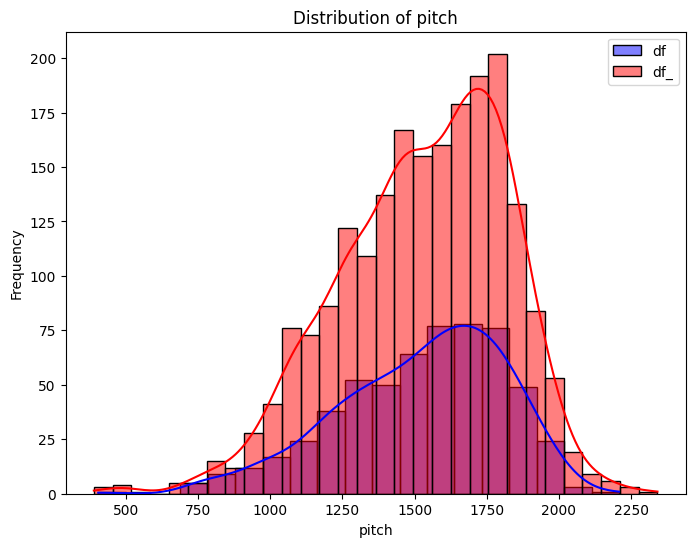

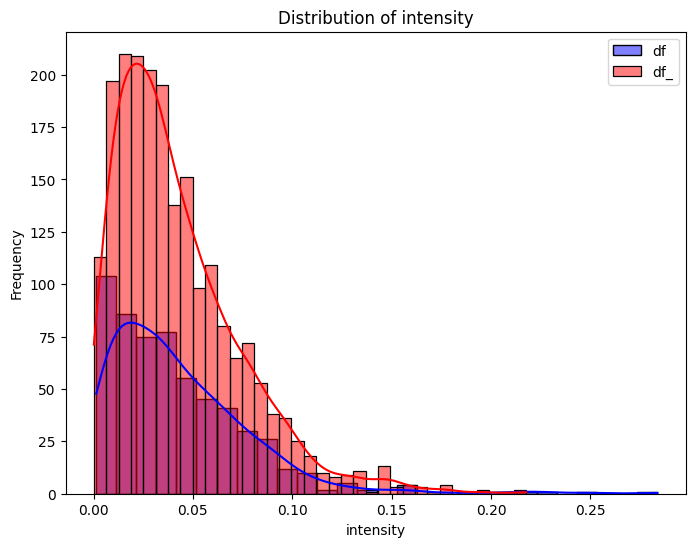

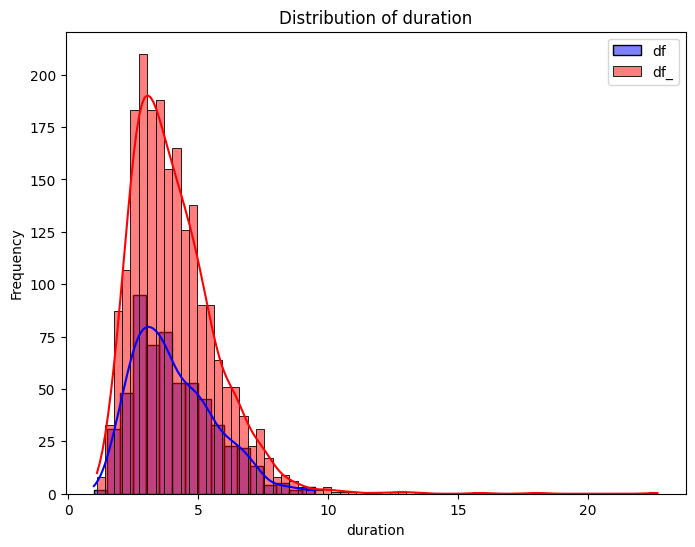

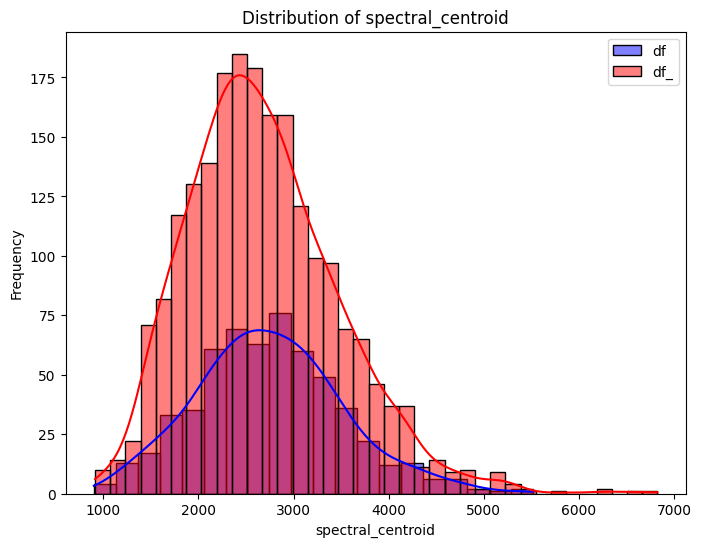

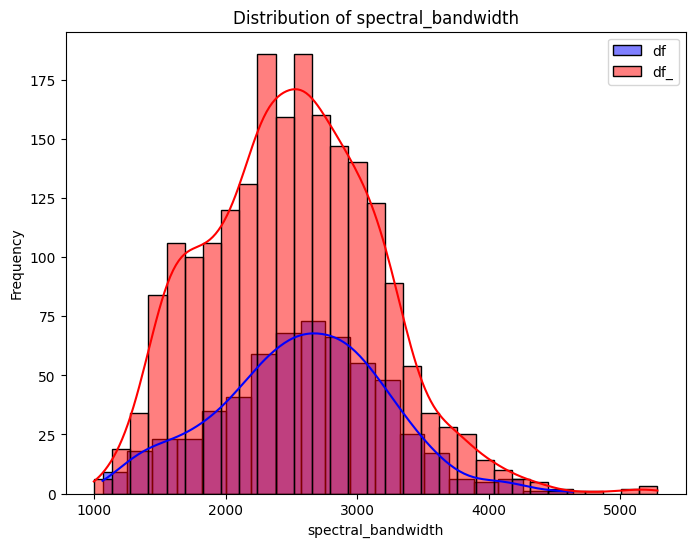

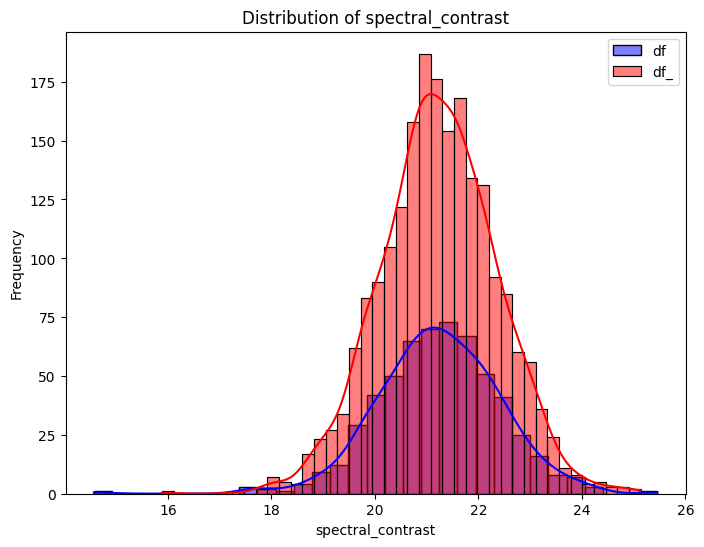

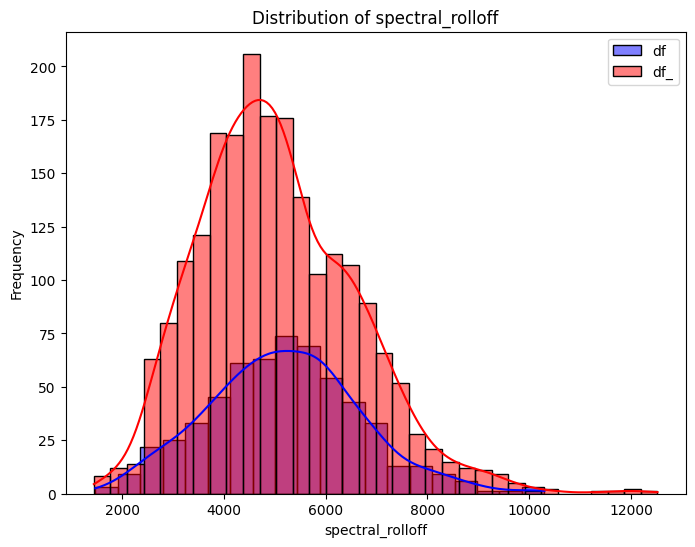

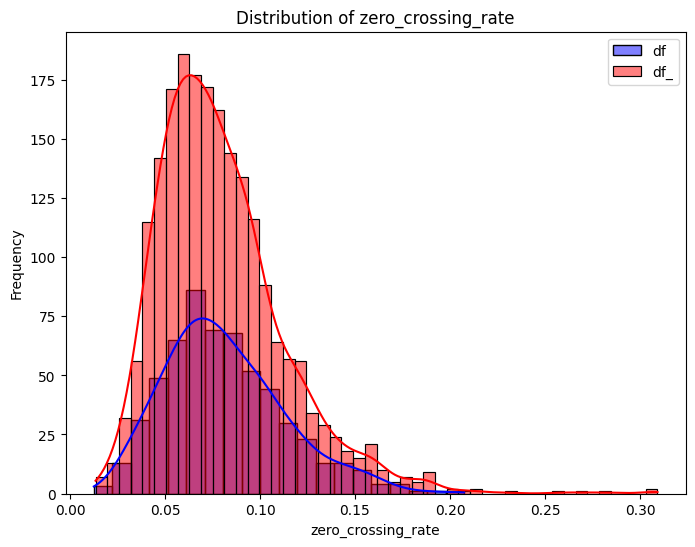

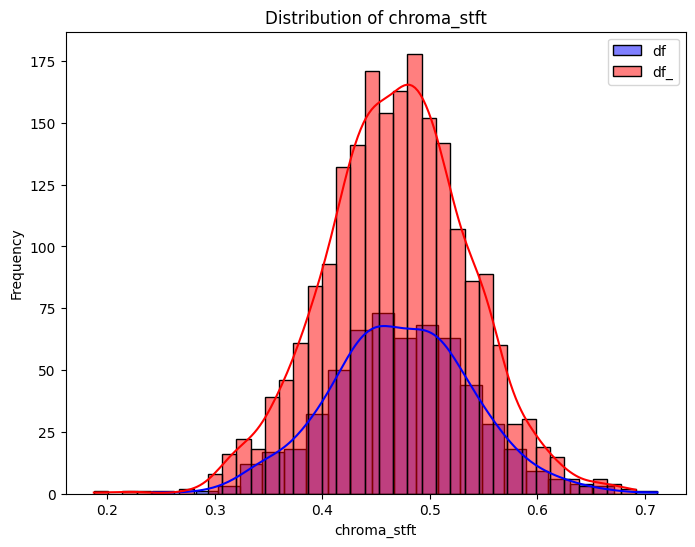

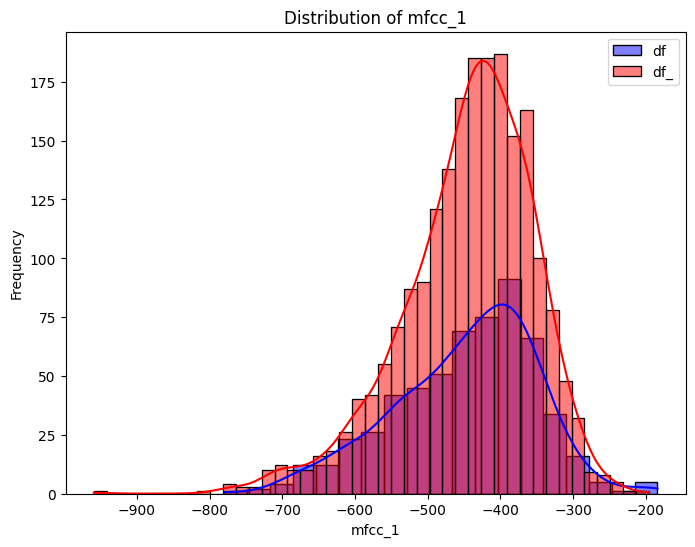

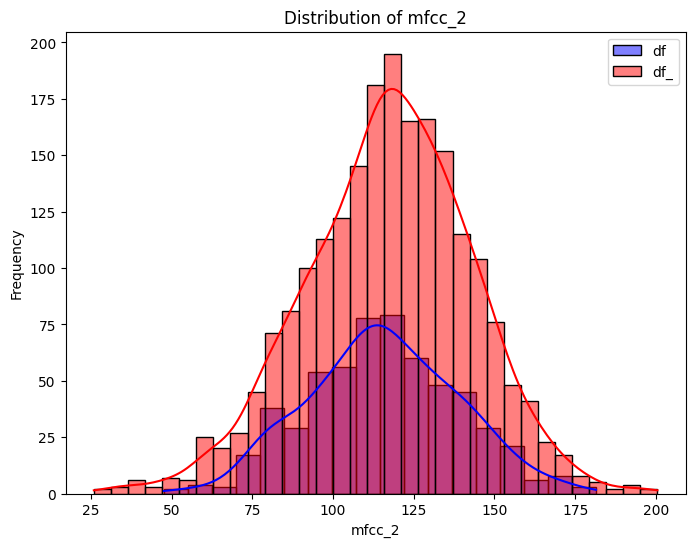

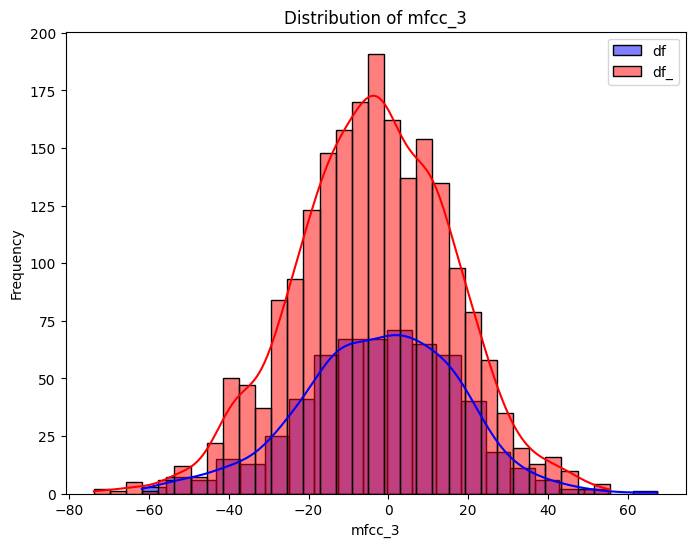

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features to visualize
features = ['pitch', 'intensity', 'duration', 'spectral_centroid', 'spectral_bandwidth', 
            'spectral_contrast', 'spectral_rolloff', 'zero_crossing_rate', 'chroma_stft', 
            'mfcc_1', 'mfcc_2', 'mfcc_3']

# Loop through each feature and visualize its distribution
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature].dropna(), kde=True, color='blue', label='df')
    sns.histplot(df_[feature].dropna(), kde=True, color='red', label='df_')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    
